### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

Extra

In [5]:
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

<Axes: ylabel='Tienda'>

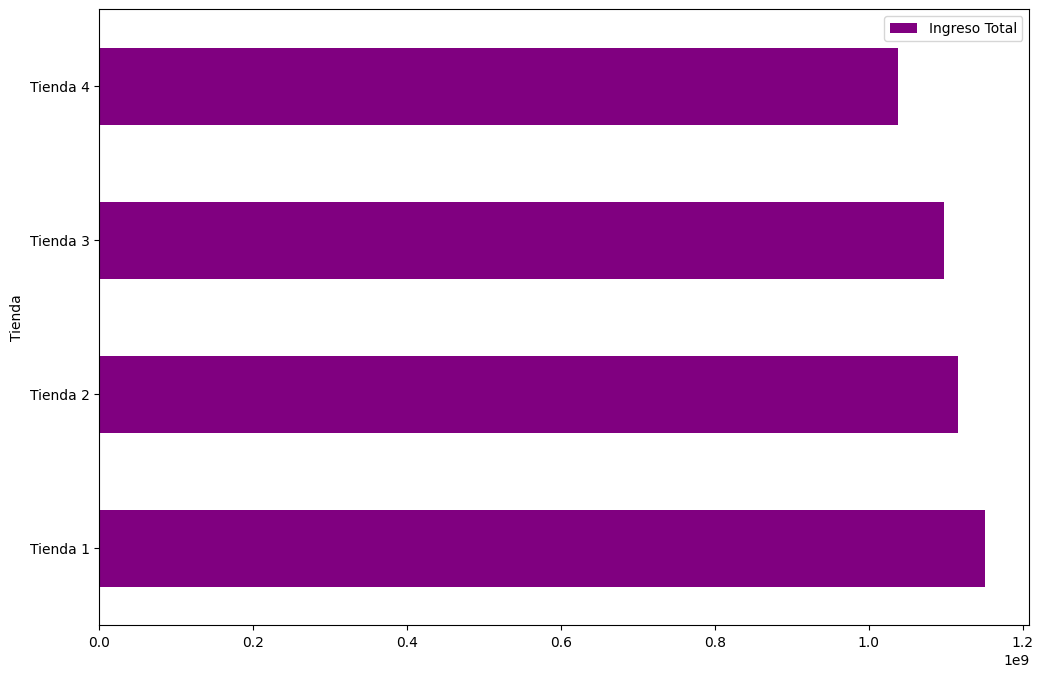

In [20]:
df_plot = pd.DataFrame({
    'Tienda': ['Tienda 1','Tienda 2','Tienda 3','Tienda 4'],
    'Ingreso Total': [
        ingreso_total_tienda1,
        ingreso_total_tienda2,
        ingreso_total_tienda3,
        ingreso_total_tienda4
    ]
})

df_plot.set_index('Tienda').plot(kind='barh', figsize=(12,8), color='purple')


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [8]:
tienda.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"].count()
tienda2.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"].count()
tienda3.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"].count()
tienda4.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"].count()

Lugar de Compra  Categoría del Producto 
Armenia          Electrónicos               1
                 Juguetes                   1
                 Libros                     1
Barranquilla     Artículos para el hogar    6
                 Deportes y diversión       9
                                           ..
Valledupar       Muebles                    1
Villavicencio    Deportes y diversión       4
                 Electrodomésticos          1
                 Libros                     1
                 Muebles                    1
Name: Producto, Length: 123, dtype: int64

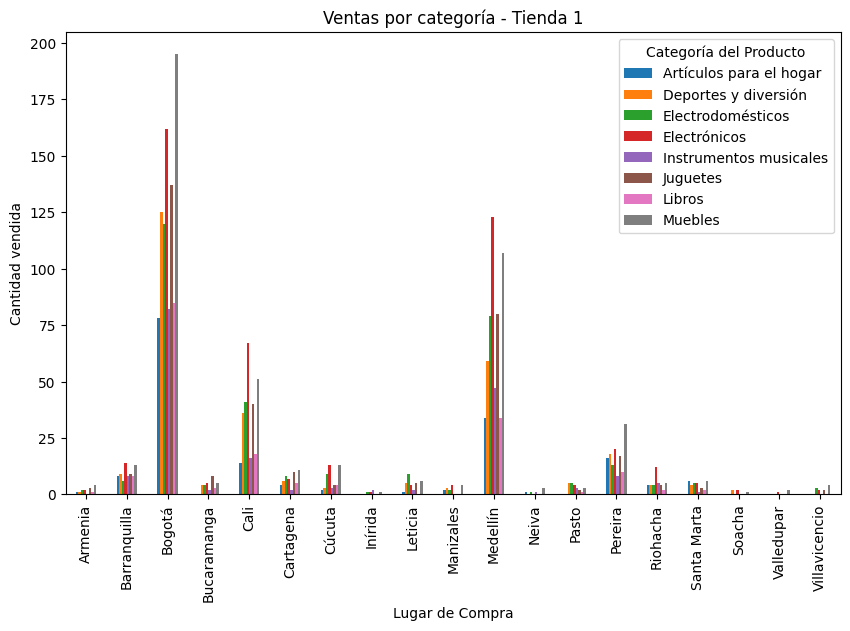

In [31]:
grupo1 = tienda.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"].count()
grupo1.unstack().plot(kind='bar', figsize=(10,6))
plt.title("Ventas por categoría - Tienda 1")
plt.ylabel("Cantidad vendida")
plt.show()


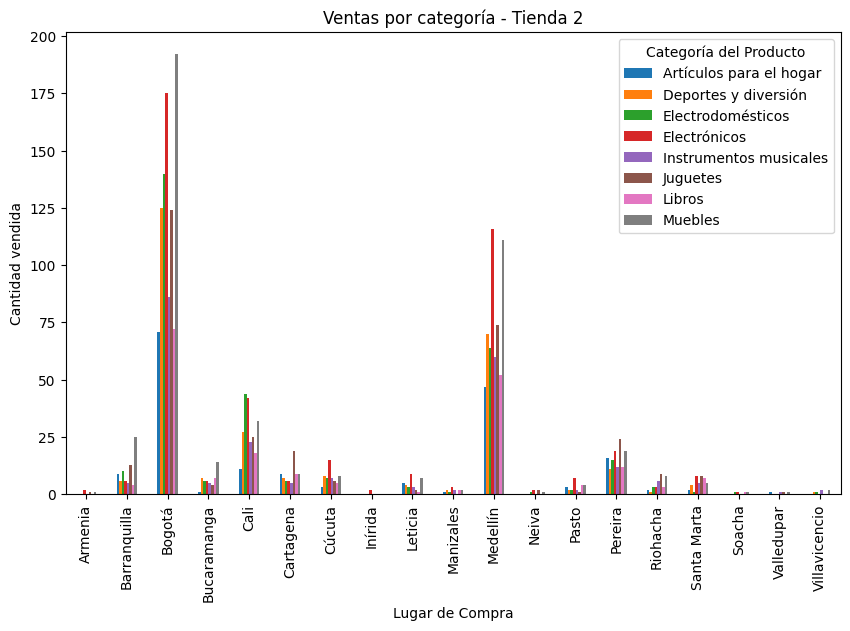

In [32]:
grupo2 = tienda2.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"].count()
grupo2.unstack().plot(kind='bar', figsize=(10,6))
plt.title("Ventas por categoría - Tienda 2")
plt.ylabel("Cantidad vendida")
plt.show()


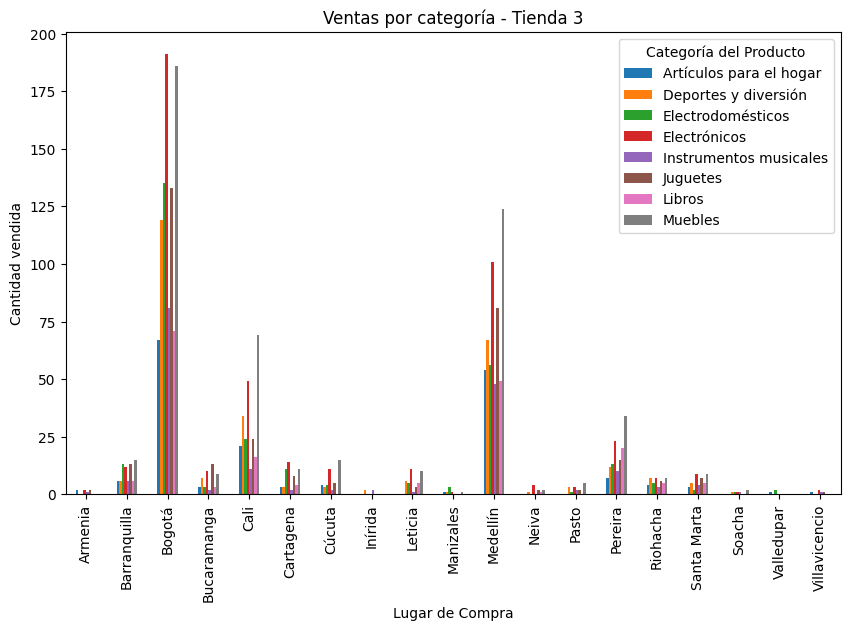

In [33]:
grupo3 = tienda3.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"].count()
grupo3.unstack().plot(kind='bar', figsize=(10,6))
plt.title("Ventas por categoría - Tienda 3")
plt.ylabel("Cantidad vendida")
plt.show()


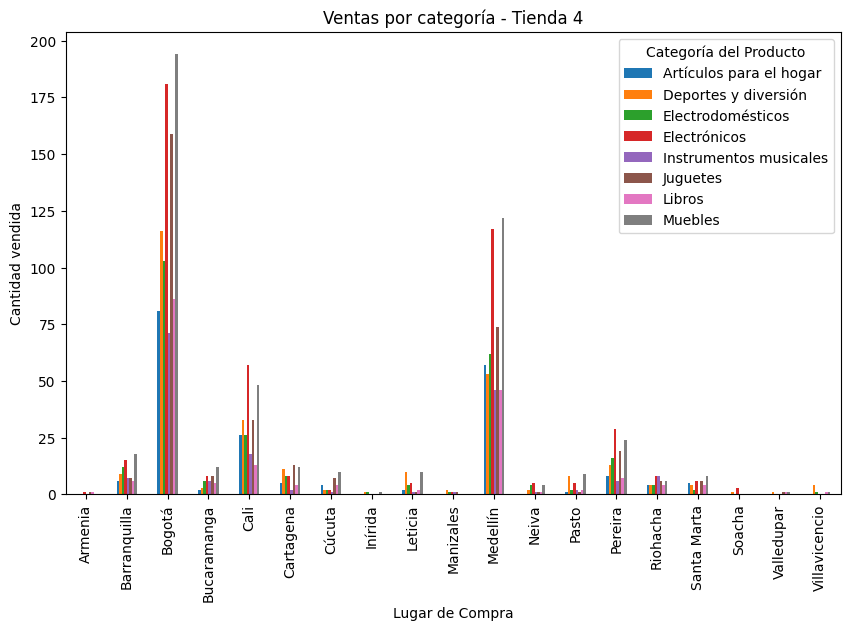

In [34]:
grupo4 = tienda4.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"].count()
grupo4.unstack().plot(kind='bar', figsize=(10,6))
plt.title("Ventas por categoría - Tienda 4")
plt.ylabel("Cantidad vendida")
plt.show()


# 3. Calificación promedio de la tienda


In [12]:
tienda['Calificación'].mean()
tienda2['Calificación'].mean()
tienda3['Calificación'].mean()
tienda4['Calificación'].mean()


np.float64(3.9957591178965224)

# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [26]:
# Conteo por tienda y producto
counts = tienda.groupby(["Lugar de Compra", "Producto"]).size()
counts2 = tienda2.groupby(["Lugar de Compra", "Producto"]).size()
counts3 = tienda3.groupby(["Lugar de Compra", "Producto"]).size()
counts4 = tienda4.groupby(["Lugar de Compra", "Producto"]).size()

# Obtener máximos y mínimos por tienda
result1 = counts.groupby(level=0).agg(["idxmax", "idxmin"])
result1

result2 = counts2.groupby(level=0).agg(["idxmax", "idxmin"])
result2

result3 = counts3.groupby(level=0).agg(["idxmax", "idxmin"])
result3

result4 = counts4.groupby(level=0).agg(["idxmax", "idxmin"])
result4

,idxmax,idxmin
Lugar de Compra,,
Armenia,"(Armenia, Asistente virtual)","(Armenia, Asistente virtual)"
Barranquilla,"(Barranquilla, Estufa)","(Barranquilla, Ajedrez de madera)"
Bogotá,"(Bogotá, Carrito de control remoto)","(Bogotá, Secadora de ropa)"
Bucaramanga,"(Bucaramanga, Juego de mesa)","(Bucaramanga, Asistente virtual)"
Cali,"(Cali, Balón de baloncesto)","(Cali, Guitarra eléctrica)"
Cartagena,"(Cartagena, Dinosaurio Rex)","(Cartagena, Ajedrez de madera)"
Cúcuta,"(Cúcuta, Mesa de noche)","(Cúcuta, Ajedrez de madera)"
Inírida,"(Inírida, Bicicleta)","(Inírida, Bicicleta)"
Leticia,"(Leticia, Balón de baloncesto)","(Leticia, Armario)"


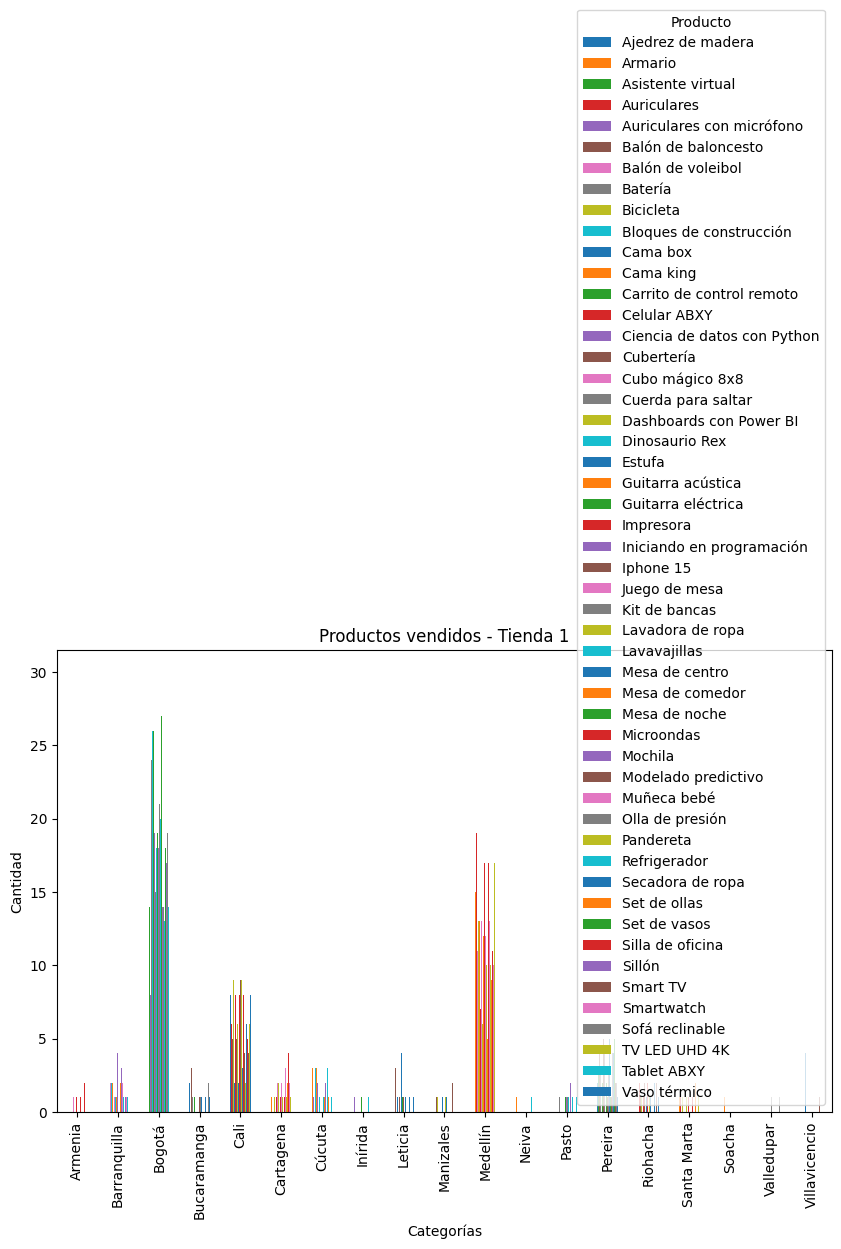

In [27]:
import matplotlib.pyplot as plt
counts.unstack().plot(kind='bar', figsize=(10,6))
plt.title("Productos vendidos - Tienda 1")
plt.ylabel("Cantidad")
plt.xlabel("Categorías")
plt.show()

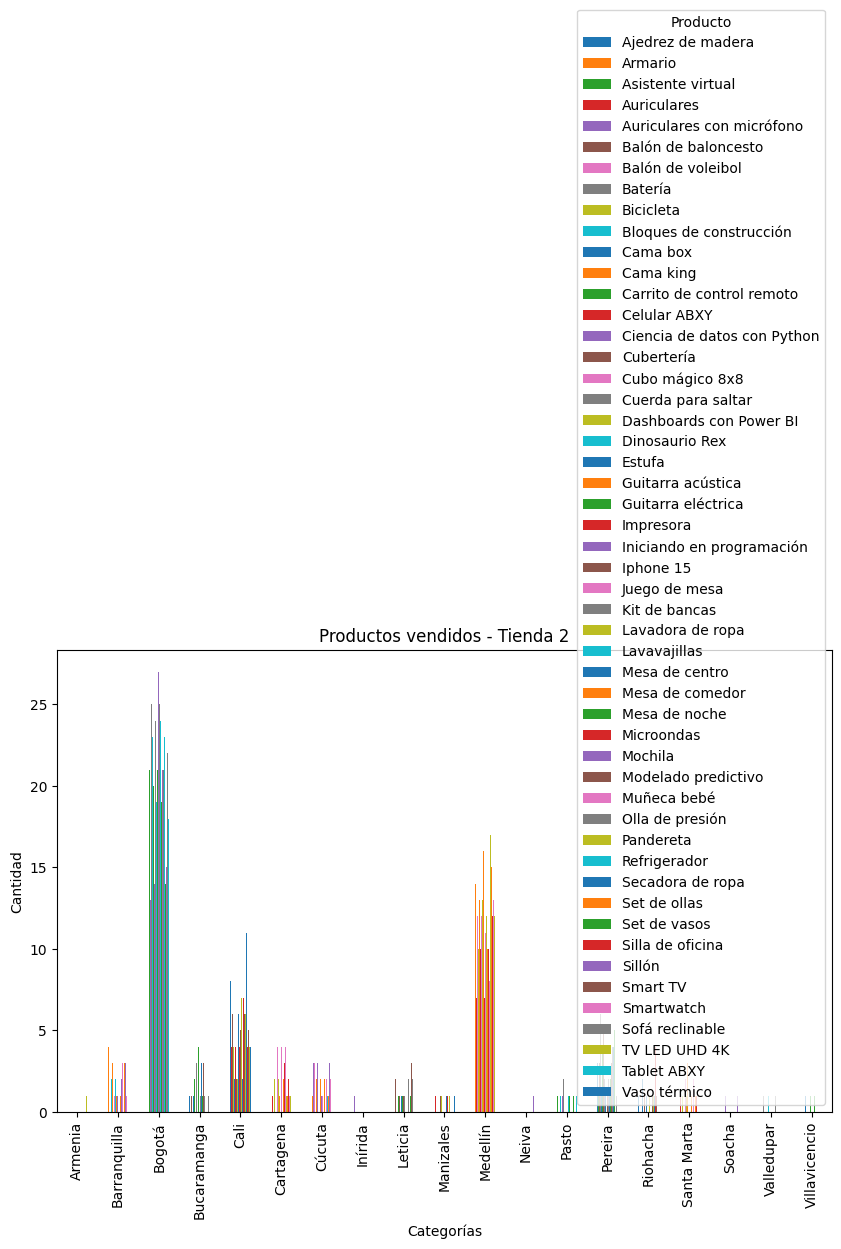

In [28]:
counts2.unstack().plot(kind='bar', figsize=(10,6))
plt.title("Productos vendidos - Tienda 2")
plt.ylabel("Cantidad")
plt.xlabel("Categorías")
plt.show()


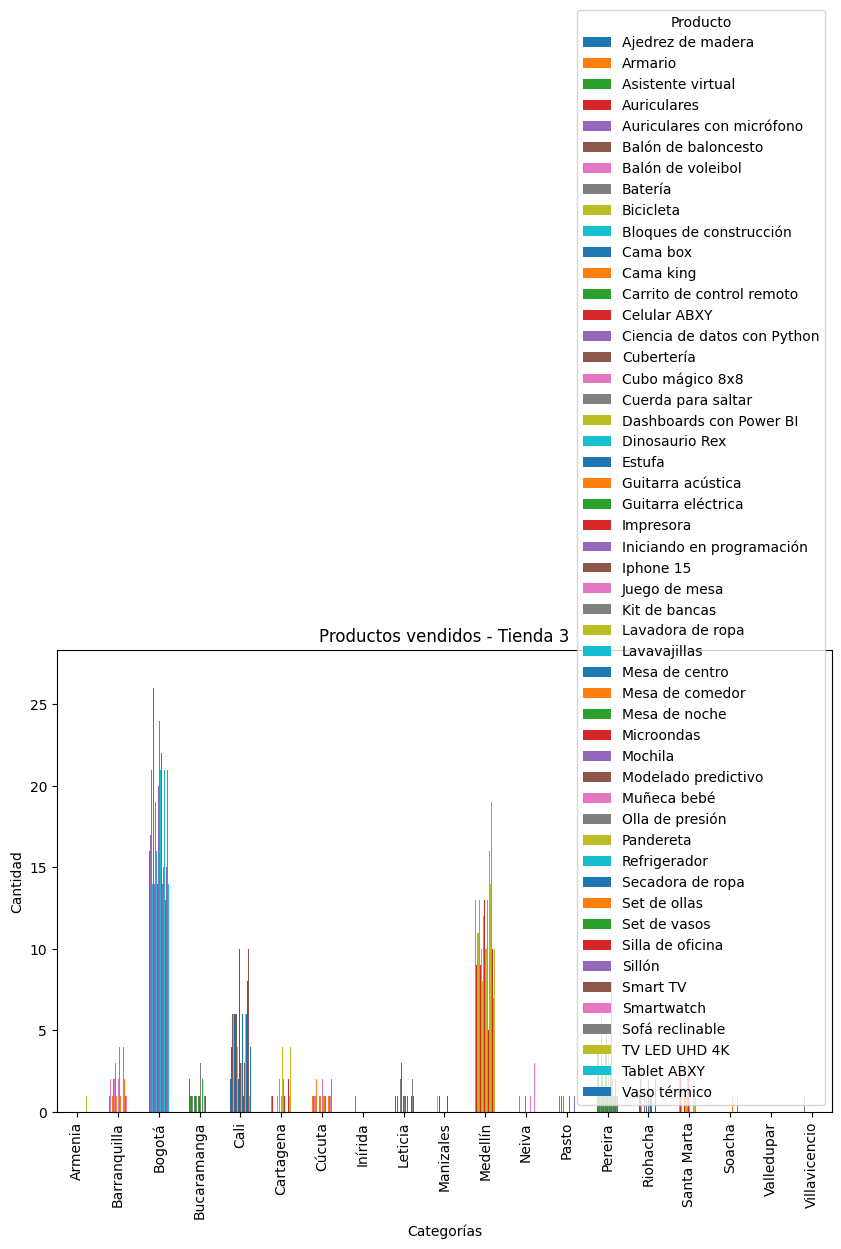

In [29]:
counts3.unstack().plot(kind='bar', figsize=(10,6))
plt.title("Productos vendidos - Tienda 3")
plt.ylabel("Cantidad")
plt.xlabel("Categorías")
plt.show()


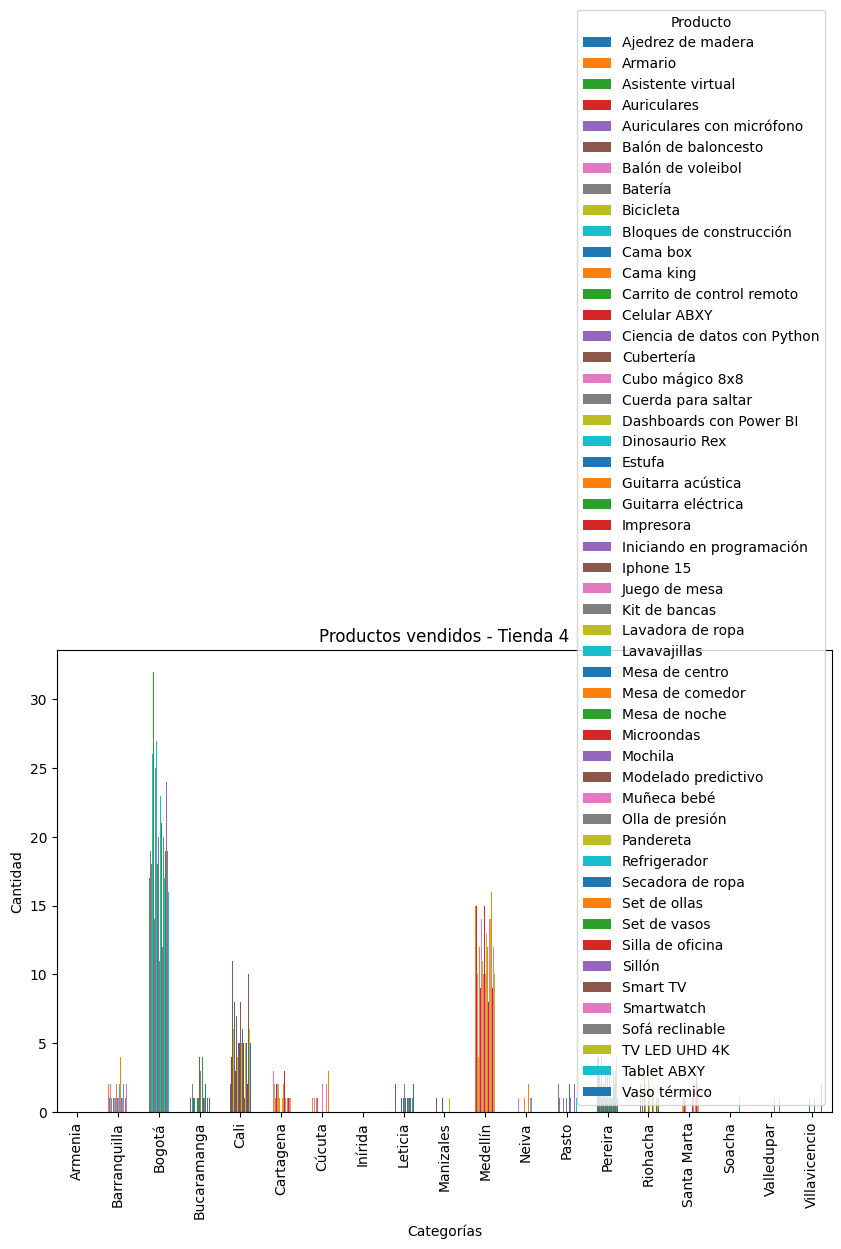

In [30]:
counts4.unstack().plot(kind='bar', figsize=(10,6))
plt.title("Productos vendidos - Tienda 4")
plt.ylabel("Cantidad")
plt.xlabel("Categorías")
plt.show()


# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [36]:
tienda['Costo de envío'].mean()

np.float64(26018.60958033065)

In [37]:
tienda2['Costo de envío'].mean()


np.float64(25216.235693090293)

In [38]:
tienda3['Costo de envío'].mean()


np.float64(24805.680373039424)

In [39]:
tienda4['Costo de envío'].mean()

np.float64(23459.457167090754)

Resumen final
con Base a los calculos de ventas, promedios , calificaciones se dictamina que la tienda 1 es una de las mejores rentables , tienda 2 y tienda 4 ha dado buenas ventas y costos de envio buenos. Por otro lado la tienda 3 deberia cerrar por sus bajos ingresos y costos altos de mantenimiento.